# Time Series Data Preparation

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import acquire
from acquire import get_store_item_demand_data


In [41]:
df = acquire.get_store_item_demand_data() 
df.head()

Reading from CSV file. . .
Reading from csv file. . .
Reading from csv file. . .


,Unnamed: 0,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
df.shape

(913000, 15)

In [6]:
df.isnull().sum()

Unnamed: 0       0
item_id          0
sale_amount      0
sale_date        0
sale_id          0
store_id         0
item_brand       0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_state      0
store_zipcode    0
dtype: int64

- Convert date column to datetime format 

In [7]:
df.sale_date = pd.to_datetime(df.sale_date)

In [8]:
#confirm the change of datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Unnamed: 0     913000 non-null  int64              
 1   item_id        913000 non-null  int64              
 2   sale_amount    913000 non-null  float64            
 3   sale_date      913000 non-null  datetime64[ns, UTC]
 4   sale_id        913000 non-null  int64              
 5   store_id       913000 non-null  int64              
 6   item_brand     913000 non-null  object             
 7   item_name      913000 non-null  object             
 8   item_price     913000 non-null  float64            
 9   item_upc12     913000 non-null  int64              
 10  item_upc14     913000 non-null  int64              
 11  store_address  913000 non-null  object             
 12  store_city     913000 non-null  object             
 13  store_state    913000 non-nul

- Plot the distribution of sale_amount and item_price 

In [9]:
#group by independent variable 
#sum by dependent variable 
# use .reset_index() to reset the index 
sale_by_item_price = df.groupby(['item_price']).sale_amount.sum().reset_index()

<AxesSubplot:xlabel='item_price'>

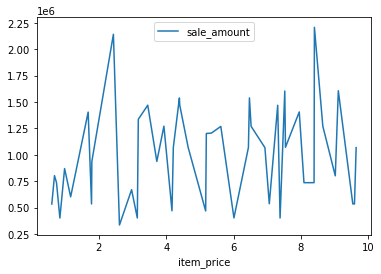

In [10]:
sale_by_item_price.plot(x='item_price', y='sale_amount')

<AxesSubplot:>

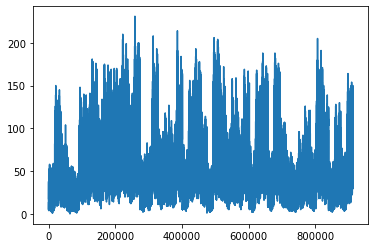

In [11]:
df.sale_amount.plot()

<AxesSubplot:>

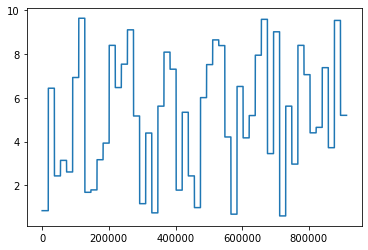

In [12]:
df.item_price.plot()

- Set the index back to be the datetime variable 

In [15]:
df = df.set_index('sale_date').sort_index()

In [16]:
#confirm change 
df.head(3)

,Unnamed: 0,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217


- Add a 'month' and 'day of week' column to your dataframe 

In [17]:
df['month'] = df.index.month 
df['day_of_week'] = df.index.day_name()
df.head()

,Unnamed: 0,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday


- Add a column to your dataframe, sales_total, which is derived from sale_amount(total items) and item_price 

In [18]:
df['sales_total'] = df.sale_amount + df.item_price 
df.head()

,Unnamed: 0,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,13.84
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,34.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,31.65
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,62.40
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,43.40


- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results 

In [19]:
def prep_store_data(df): 
    #convert sale_date feature to datetime dtype
    df.sale_date = pd.to_datetime(df.sale_date)
    #set sale_date to index
    df = df.set_index('sale_date').sort_index()
    #rename sale_amount column
    df = df.rename(columns={'sale_amount': 'quantity'})
    #create a feature with only month from index
    df['month'] = df.index.month
    #create a feature with day name from day index 
    df['day_of_week'] = df.index.day_name()
    #create a feature sales total that is the product of quantity and sale price
    df['sales_total'] = df.quantity * df.item_price
    return df 

# German Electric Dataset 

In [23]:
df = acquire.german_electric()

### Convert date column to datetime format.

In [24]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [25]:
df.Date = pd.to_datetime(df.Date)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


### Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind+Solar'}>, <AxesSubplot:>]],
      dtype=object)

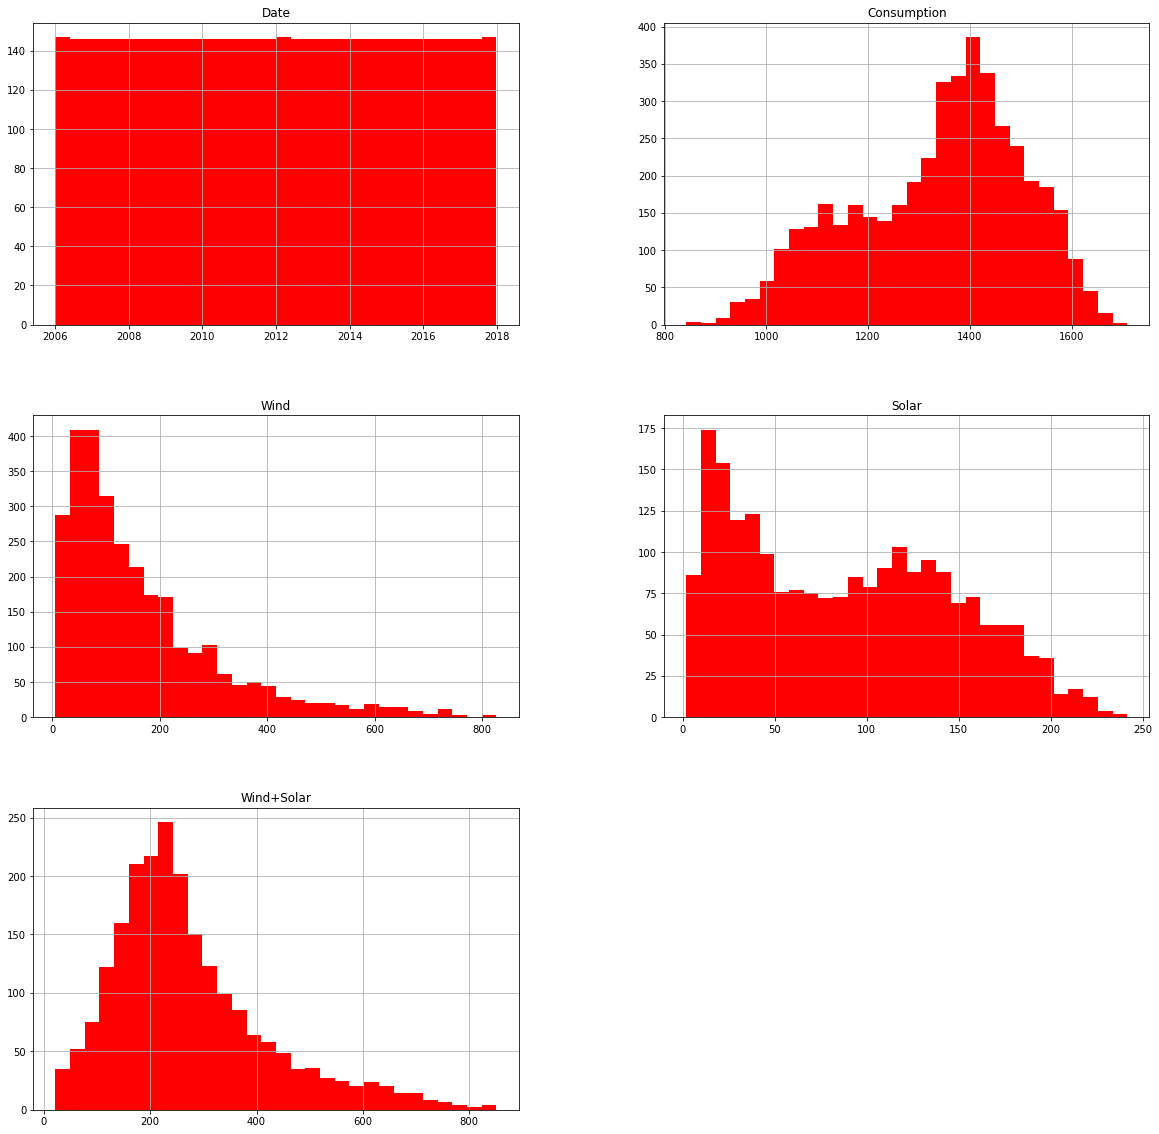

In [27]:
df.hist(bins = 30, figsize = (20, 20), color= 'r')

### Set the index to be the datetime variable.

In [28]:
df = df.set_index('Date').sort_index()

### Add a month and a year column to your dataframe

In [29]:
df['month'] = df.index.month
df['year'] = df.index.year

In [30]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### Fill any missing values.

In [39]:
#dropped missing values in acquire.ipynb

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [40]:
def prep_german_electric_data(df): 
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index('Date').sort_index()
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df